**Tim Akhirnya Belajar**

Melvin Putra

Maxwell Thomson

Evan Eka Wijaya

## Packages & Import Files

In [ ]:
import pandas as pd
import numpy as np
import re
import random
from tqdm import tqdm
import warnings 
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

!pip install catboost
import catboost as cb
from scipy import stats
import sklearn
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import  LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold,ParameterGrid
from sklearn.metrics import  mean_squared_error, mean_absolute_error
from geopy.geocoders import Nominatim
!pip install langdetect
from langdetect import detect

from wordcloud import WordCloud
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline  
from wordcloud import WordCloud

!pip install googletrans==3.1.0a0
from googletrans import Translator
translator = Translator()

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models
from gensim.models import CoherenceModel
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,sent_tokenize
import nltk
nltk.download('wordnet')

## Functions

In [ ]:
def bin_wil(x):
  if x in ['Aceh']:
    return 'tier_1'
  elif x in ['Jakarta Raya','Bali']:
    return 'tier_2'
  elif x in ['Sulawesi Utara','Sulawesi Tengah','Sumatera Utara','Kepulauan Riau']:
    return 'tier_3'
  elif x in ['Sulawesi Barat','Jawa Barat','Kalimantan Selatan','Kalimantan Tengah','Banten','Nusa Tenggara Barat','Nusa Tenggara Timur','Kalimantan Timur','Kalimantan Utara']:
    return 'tier_4'
  elif x in ['Jawa Tengah','Sulawesi Selatan','Bangka Belitung','Papua','Jawa Timur','Kalimantan Barat','Sulawesi Tenggara','Sumatera Selatan','Riau','Sumatera Barat']:
    return 'tier_5'
  elif x in ['Bengkulu','Maluku Utara','Yogyakarta']:
    return 'tier_6'
  elif x in ['Maluku','Lampung','Jambi']:
    return 'tier_7'
  elif x in ['Gorontalo']:
    return 'tier_8'

def highest_edu(x):
    if bool(re.search(r"S3",x)) :
        return "Doktor"
    elif bool(re.search(r"S2",x)) :
        return "Magister"
    elif bool(re.search(r"S1",x)) :
        return "Sarjana"
    elif bool(re.search(r"D4",x)) :
        return "D4"
    elif bool(re.search(r"SMA",x)) or bool(re.search(r"SMU/SMK/STM",x)) :
        return "SMA/SMU/SMK/STM"
    elif bool(re.search(r"Tidak terspesifikasi",x)) :
        return "Tidak terspesifikasi"
    else:
        return "lainnya"

def highest_edu2(x):
    if bool(re.search(r"S3",x)) :
        return "Doktor"
    elif bool(re.search(r"S2",x)) :
        return "Magister"
    elif bool(re.search(r"S1",x)) :
        return "Sarjana"
    elif bool(re.search(r"D4",x)) :
        return "D4"
    elif bool(re.search(r"SMA",x)) or bool(re.search(r"SMU",x)) or bool(re.search(r"SMK",x)) or bool(re.search(r"STM",x)):
        return "SMA/SMU/SMK/STM"
    else:
        return "lainnya"
        
df_dum3 = df_6k.groupby(['company_industry']).mean().reset_index().sort_values(by='salary')

tier1 = list(df_dum3[df_dum3['salary'] >= 10000000]['company_industry'].values)
tier3 = list(df_dum3[(df_dum3['salary'] >= 9000000) & (df_dum3['salary'] < 10000000)]['company_industry'].values)
tier4 = list(df_dum3[(df_dum3['salary'] >= 8000000) & (df_dum3['salary'] < 9000000)]['company_industry'].values)
tier5 = list(df_dum3[(df_dum3['salary'] >= 7000000) & (df_dum3['salary'] < 8000000)]['company_industry'].values)
tier6 = list(df_dum3[(df_dum3['salary'] >= 6000000) & (df_dum3['salary'] < 7000000)]['company_industry'].values)
tier7 = list(df_dum3[(df_dum3['salary'] >= 5000000) & (df_dum3['salary'] < 6000000)]['company_industry'].values)
tier8 = list(df_dum3[(df_dum3['salary'] >= 4000000) & (df_dum3['salary'] < 5000000)]['company_industry'].values)
tier9 = list(df_dum3[(df_dum3['salary'] >= 3000000) & (df_dum3['salary'] < 4000000)]['company_industry'].values)

def bin_comp_ind(x):
  if x in tier1:
    return 'tier1'
  elif x in tier3:
    return 'tier3'
  elif x in tier4:
    return 'tier4'
  elif x in tier5:
    return 'tier5'
  elif x in tier6:
    return 'tier6'
  elif x in tier7:
    return 'tier7'
  elif x in tier8:
    return 'tier8'
  elif x in tier9:
    return 'tier9'

def detect_bhs(x):
  return detect(x)

exp_list_fresh=['1','2']
exp_list_rendah=['3','4','5']
exp_list_sedang=['6','7','8','9','10','11','12','13','14','15']
exp_list_tinggi=['16','17','18','19','20','Lebih']

def exp(x):
  if x in exp_list_fresh:
    return 'fresh'
  elif x in exp_list_rendah:
    return 'rendah'
  elif x in exp_list_sedang:
    return 'sedang'
  elif x in exp_list_tinggi:
    return 'tinggi'
  else:
    return 'tidak terspesifikasi'

def to_jkt(x):
  if x == 'Jakarta Raya' or x == 'Jakarta Pusat' or x == 'Jakarta Utara' or x == 'Jakarta Barat' or x == 'Jakarta Timur' or x == 'Jakarta Utara' or x == 'Jakarta Selatan' or x == 'Kepulauan Seribu':
    return 'DKI Jakarta'
  else:
    return x

def ext_state(x):
  location = geolocator.geocode( x + ', Indonesia', addressdetails=True)
  return location.raw['address']['state'] if 'state' in location.raw['address'].keys() else x

def to_en(x):
  hasil = translator.translate(x, dest='en')
  return hasil.text

daerah_sw = ['karawang;','java','jawa','surabaya','tangerang','timur','jabodetabek','jabar','subang','jakarta','and','sumatera','area','palembang','padang','riau','south','west','east','sulawesi','papua','probolinggo','cikarang','lampung']

def clean_text(desc):
    le = WordNetLemmatizer()
    tokens= [[le.lemmatize(word) for word in re.sub("[^a-zA-Z]"," ", s).split() if len(word)>1 and word.lower() not in daerah_sw] for s in desc]
    lower = [[word.lower() for word in ss] for ss in tokens]
    return tokens


## EDA

### Lokasi

In [ ]:
geolocator = Nominatim()

df = pd.read_csv('/content/drive/MyDrive/fit2022/train.csv', delimiter='|')
df = df[df['salary_currency']!='USD']
df = df.drop(columns=['id'])
df_6k = df.dropna(subset=['salary']).reset_index(drop=True)
df_dum2 = df_6k.copy()

df_6k['provinsi'] = df_6k['location'].apply(ext_state)
df_6k['provinsi'] = df_6k['provinsi'].apply(to_jkt)
df_prov = df_6k.copy()

df_prov['provinsi_r'] = df_prov['provinsi'].replace('Jakarta Raya','DKI Jakarta')
df_dum2['provinsi'] = df_prov['provinsi_r']
df_prov['new'] = df_prov['provinsi_r'].replace('DKI Jakarta', 'Jakarta Raya').replace('Daerah Istimewa Yogyakarta','Yogyakarta').replace('Kepulauan Bangka Belitung','Bangka Belitung')

df_dum2 = df_dum2[df_dum2['salary']>6000]
df_dum2=df_dum2.groupby('provinsi').mean().reset_index()

In [ ]:
df_dum2.sort_values(by='salary', ascending=False).head(5)

,provinsi,salary
0,Aceh,9.222500e+06
4,DKI Jakarta,8.235869e+06
1,Bali,8.188959e+06
17,Kepulauan Riau,7.884167e+06
32,Sumatera Utara,7.616093e+06


### Industri Perusahaan & Pekerjaan

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/fit2022/train.csv', delimiter='|')
df = df[df['salary_currency']!='USD']
df = df.drop(columns=['id'])
df_6k = df.dropna(subset=['salary']).reset_index(drop=True)
df_6k["job_detail"] = df_6k["job_function"].str.split(",").str[1]

df2 = df_6k.groupby(['company_industry']).agg(mean_salary=('salary','mean'),count=('salary','count')).sort_values(['mean_salary'],ascending=False).reset_index()
df2 = df2[df2['count']>5].head(5)

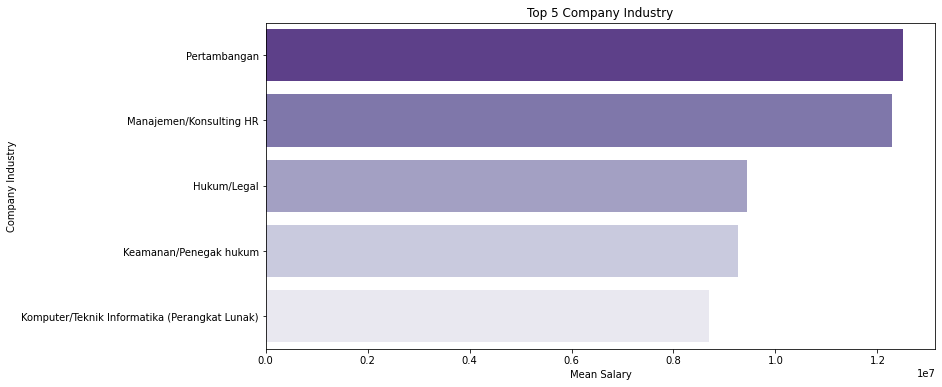

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y='company_industry',x='mean_salary',data=df2, palette="Purples_r")
plt.xlabel('Mean Salary')
plt.ylabel('Company Industry')
plt.title('Top 5 Company Industry')

plt.savefig('top5.png', bbox_inches='tight')

In [ ]:
df_6k[df_6k['company_industry']=='Pertambangan'].groupby(['job_detail']).agg(mean_salary=('salary','mean'),count=('salary','count')).sort_values(['mean_salary'],ascending=False).head(10)

,mean_salary,count
job_detail,,
Pemasaran/Pengembangan Bisnis,105000000.0,1
Pengacara / Asisten Legal,17000000.0,3
Pemeliharaan,15000000.0,1
Sumber Daya Manusia / HR,14100000.0,5
Manufaktur,13500000.0,1
Akuntansi Umum / Pembiayaan,12500000.0,8
Sekretaris,12250000.0,2
Teknik Lainnya,12250000.0,2
Top Management / Manajemen Tingkat Atas,12000000.0,1


In [ ]:
df_6k[df_6k['company_industry']=='Pertambangan']['job_detail'].value_counts(normalize=True)

Akuntansi Umum / Pembiayaan                0.140351
Pembelian/Manajemen Material               0.105263
Lainnya/Kategori tidak tersedia            0.105263
Teknik Lingkungan                          0.105263
Sumber Daya Manusia / HR                   0.087719
IT-Perangkat Lunak                         0.052632
Geologi/Geofisika                          0.052632
Pengacara / Asisten Legal                  0.052632
Jurnalis/Editor                            0.035088
Teknik Lainnya                             0.035088
Penjualan - Teknik/Teknikal/IT             0.035088
Sekretaris                                 0.035088
Staf / Administrasi umum                   0.035088
Pemasaran/Pengembangan Bisnis              0.017544
Makanan/Minuman/Pelayanan Restoran         0.017544
Manufaktur                                 0.017544
Praktisi/Asisten Medis                     0.017544
Mekanikal                                  0.017544
Top Management / Manajemen Tingkat Atas    0.017544
Pemeliharaan

In [ ]:
df_6k[df_6k['company_industry']=='Manajemen/Konsulting HR'].groupby(['job_detail']).agg(mean_salary=('salary','mean'),count=('salary','count')).sort_values(['mean_salary'],ascending=False).head(5)

,mean_salary,count
job_detail,,
Keuangan / Investasi Perusahaan,8.500000e+07,1
Top Management / Manajemen Tingkat Atas,5.000000e+07,1
Properti/Real Estate,3.103333e+07,3
Perbankan / Jasa Finansial,2.285446e+07,13
Pemasaran/Pengembangan Bisnis,2.120400e+07,20


In [ ]:
df_6k[df_6k['company_industry']=='Manajemen/Konsulting HR']['job_detail'].value_counts(normalize=True)

Penjualan Ritel                            0.143564
Penjualan - Korporasi                      0.103960
IT-Perangkat Lunak                         0.099010
Akuntansi Umum / Pembiayaan                0.061881
Pemasaran/Pengembangan Bisnis              0.049505
Sumber Daya Manusia / HR                   0.047030
Layanan Pelanggan                          0.044554
IT-Admin Jaringan/Sistem/Database          0.034653
Perbankan / Jasa Finansial                 0.032178
Audit & Pajak                              0.032178
Makanan/Minuman/Pelayanan Restoran         0.029703
Manufaktur                                 0.024752
Mekanikal                                  0.022277
Penjualan - Teknik/Teknikal/IT             0.022277
Teknik Sipil/Konstruksi Bangunan           0.017327
Pengacara / Asisten Legal                  0.017327
Teknik Elektro                             0.014851
Telesales/Telemarketing                    0.014851
Staf / Administrasi umum                   0.014851
Logistik/Ran

In [ ]:
df_6k[df_6k['company_industry']=='Hukum/Legal'].groupby(['job_detail']).agg(mean_salary=('salary','mean'),count=('salary','count')).sort_values(['mean_salary'],ascending=False).head(5)

,mean_salary,count
job_detail,,
IT-Perangkat Lunak,12500000.0,5
Penjualan Ritel,8750000.0,1
Pengacara / Asisten Legal,8500000.0,3
Akuntansi Umum / Pembiayaan,6700000.0,2
Seni / Desain Kreatif,3250000.0,1


In [ ]:
df_6k[df_6k['company_industry']=='Hukum/Legal']['job_detail'].value_counts(normalize=True)

IT-Perangkat Lunak             0.416667
Pengacara / Asisten Legal      0.250000
Akuntansi Umum / Pembiayaan    0.166667
Penjualan Ritel                0.083333
Seni / Desain Kreatif          0.083333
Name: job_detail, dtype: float64

In [ ]:
df_6k[df_6k['company_industry']=='Keamanan/Penegak hukum'].groupby(['job_detail']).agg(mean_salary=('salary','mean'),count=('salary','count')).sort_values(['mean_salary'],ascending=False).head(5)

,mean_salary,count
job_detail,,
Angkatan Bersenjata,1.483333e+07,3
Teknik Sipil/Konstruksi Bangunan,7.440000e+06,1
IT-Perangkat Lunak,7.200000e+06,1
Audit & Pajak,7.000000e+06,1
Pengacara / Asisten Legal,6.100000e+06,1


In [ ]:
df_6k[df_6k['company_industry']=='Keamanan/Penegak hukum']['job_detail'].value_counts(normalize=True)

Angkatan Bersenjata                  0.333333
Pengacara / Asisten Legal            0.111111
Digital Marketing                    0.111111
IT-Admin Jaringan/Sistem/Database    0.111111
Teknik Sipil/Konstruksi Bangunan     0.111111
IT-Perangkat Lunak                   0.111111
Audit & Pajak                        0.111111
Name: job_detail, dtype: float64

In [ ]:
df_6k[df_6k['company_industry']=='Komputer/Teknik Informatika (Perangkat Lunak)'].groupby(['job_detail']).agg(mean_salary=('salary','mean'),count=('salary','count')).sort_values(['mean_salary'],ascending=False).head(5)

,mean_salary,count
job_detail,,
Pelatihan & Pengembangan,1.566667e+07,3
Merchandising,1.500000e+07,1
Digital Marketing,1.219167e+07,15
Keuangan / Investasi Perusahaan,1.200000e+07,1
IT-Perangkat Lunak,9.625252e+06,218


In [ ]:
df_6k[df_6k['company_industry']=='Komputer/Teknik Informatika (Perangkat Lunak)']['job_detail'].value_counts(normalize=True)

IT-Perangkat Lunak                   0.551899
IT-Admin Jaringan/Sistem/Database    0.075949
Penjualan - Korporasi                0.048101
Digital Marketing                    0.037975
Akuntansi Umum / Pembiayaan          0.035443
Pemasaran/Pengembangan Bisnis        0.032911
Sumber Daya Manusia / HR             0.022785
Penjualan Ritel                      0.022785
Seni / Desain Kreatif                0.020253
Telesales/Telemarketing              0.020253
Layanan Pelanggan                    0.015190
Penjualan - Teknik/Teknikal/IT       0.010127
Hubungan Masyarakat                  0.010127
IT-Perangkat Keras                   0.010127
E-commerce                           0.010127
Perbankan / Jasa Finansial           0.010127
Pelatihan & Pengembangan             0.007595
Periklanan                           0.007595
Pembelian/Manajemen Material         0.007595
Teknikal & Bantuan Pelanggan         0.007595
Staf / Administrasi umum             0.005063
Pengacara / Asisten Legal         

### Education Level

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/fit2022/train.csv', delimiter='|')
df = df[df['salary_currency']!='USD']
df = df.drop(columns=['id'])
df_6k = df.dropna(subset=['salary']).reset_index(drop=True)

In [ ]:
train2 = df_6k.copy()
train2['highest_edu2'] = df_6k['education_level'].apply(lambda x: highest_edu2(x)) 
train2[['function1','function2']]=(df_6k['job_function'].str.split(',',expand=True)) 

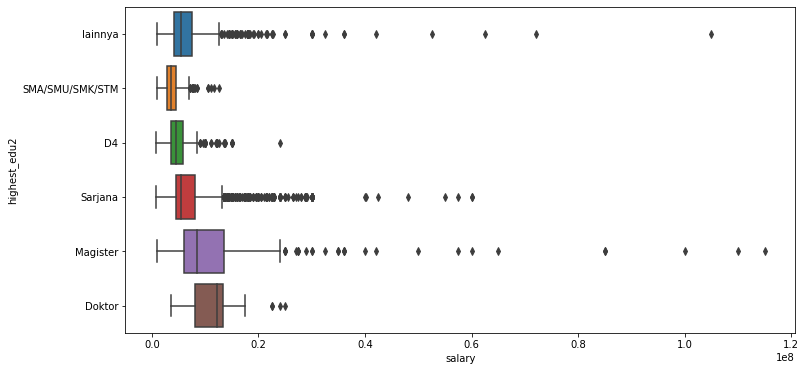

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(y='highest_edu2',x='salary',data=train2,order=('lainnya','SMA/SMU/SMK/STM','D4','Sarjana','Magister','Doktor'))

In [ ]:
df_edu=train2.groupby(['highest_edu2']).agg(Mean_salary=('salary','mean'))
df_edu=df_edu.reset_index()
df_edu.sort_values(['Mean_salary'],ascending=False)

,highest_edu2,Mean_salary
1,Doktor,1.209444e+07
2,Magister,1.146698e+07
4,Sarjana,7.009770e+06
5,lainnya,6.974654e+06
0,D4,5.094228e+06
3,SMA/SMU/SMK/STM,3.788580e+06


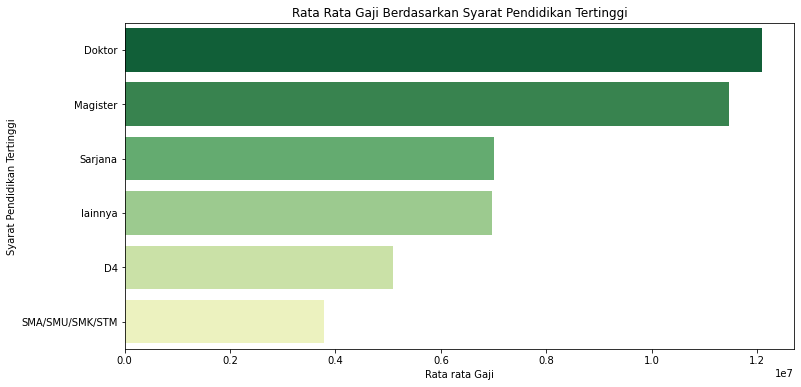

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y='highest_edu2',x='Mean_salary',data=df_edu.sort_values(['Mean_salary'],ascending=False),palette='YlGn_r')
plt.title('Rata Rata Gaji Berdasarkan Syarat Pendidikan Tertinggi')
plt.xlabel('Rata rata Gaji')
plt.ylabel('Syarat Pendidikan Tertinggi')
plt.savefig('edu1.png')

In [ ]:
df_educl=train2.groupby(['highest_edu2','career_level']).agg(Mean_salary=('salary','mean'))
df_educl=df_educl.reset_index()
df_educl.sort_values(['Mean_salary'],ascending=False).head(10)

,highest_edu2,career_level,Mean_salary
9,Magister,CEO/GM/Direktur/Manajer Senior,3.763002e+07
23,lainnya,CEO/GM/Direktur/Manajer Senior,3.168333e+07
5,Doktor,CEO/GM/Direktur/Manajer Senior,2.000000e+07
18,Sarjana,CEO/GM/Direktur/Manajer Senior,1.964262e+07
6,Doktor,Manajer/Asisten Manajer,1.496136e+07
11,Magister,Manajer/Asisten Manajer,1.489443e+07
8,Doktor,Supervisor/Koordinator,1.345625e+07
20,Sarjana,Manajer/Asisten Manajer,1.290244e+07
25,lainnya,Manajer/Asisten Manajer,1.178606e+07
2,D4,Manajer/Asisten Manajer,9.879311e+06


In [ ]:
df_sma1=df_educl[df_educl['highest_edu2']=='SMA/SMU/SMK/STM'].sort_values(['Mean_salary'],ascending=False)
df_sma1

,highest_edu2,career_level,Mean_salary
17,SMA/SMU/SMK/STM,Supervisor/Koordinator,5.508889e+06
15,SMA/SMU/SMK/STM,Manajer/Asisten Manajer,5.483333e+06
16,SMA/SMU/SMK/STM,Pegawai (non-manajemen & non-supervisor),3.743306e+06
14,SMA/SMU/SMK/STM,Lulusan baru/Pengalaman kerja kurang dari 1 tahun,3.304539e+06


In [ ]:
df_sarjana1=df_educl[df_educl['highest_edu2']=='Sarjana'].sort_values(['Mean_salary'],ascending=False)
df_sarjana1

,highest_edu2,career_level,Mean_salary
18,Sarjana,CEO/GM/Direktur/Manajer Senior,1.964262e+07
20,Sarjana,Manajer/Asisten Manajer,1.290244e+07
22,Sarjana,Supervisor/Koordinator,7.594016e+06
21,Sarjana,Pegawai (non-manajemen & non-supervisor),5.602281e+06
19,Sarjana,Lulusan baru/Pengalaman kerja kurang dari 1 tahun,4.875226e+06


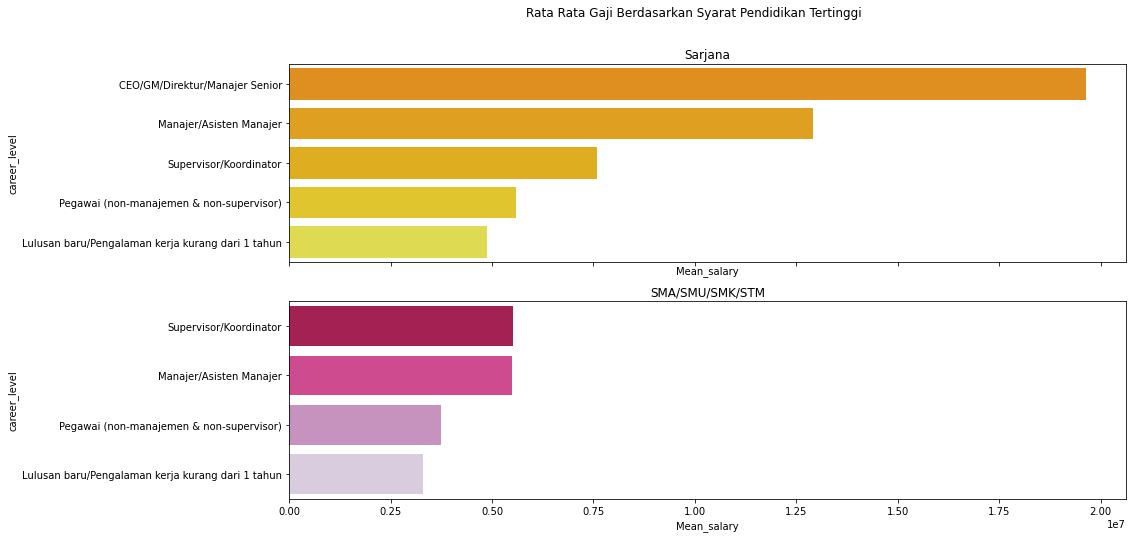

In [ ]:
fig, axes = plt.subplots(2,1 , figsize=(15, 8), sharex=True)
fig.suptitle('Rata Rata Gaji Berdasarkan Syarat Pendidikan Tertinggi')
sns.barplot(y='career_level',x='Mean_salary',data=df_sarjana1,palette='Wistia_r',ax=axes[0])
axes[0].set_title('Sarjana')
sns.barplot(y='career_level',x='Mean_salary',data=df_sma1,palette='PuRd_r',ax=axes[1])
axes[1].set_title('SMA/SMU/SMK/STM')
fig.savefig('careerlevel1.png')

In [ ]:
train2[train2['highest_edu2']=='SMA/SMU/SMK/STM']['function2'].value_counts(normalize=True).head(5)

Penjualan Ritel                       0.237530
Makanan/Minuman/Pelayanan Restoran    0.149644
Perbankan / Jasa Finansial            0.068884
Pekerjaan Umum                        0.057007
Staf / Administrasi umum              0.049881
Name: function2, dtype: float64

In [ ]:
train2[train2['highest_edu2']=='Sarjana']['function2'].value_counts(normalize=True).head(5)

Penjualan Ritel                  0.113127
IT-Perangkat Lunak               0.102455
Akuntansi Umum / Pembiayaan      0.082177
Pemasaran/Pengembangan Bisnis    0.057097
Sumber Daya Manusia / HR         0.046692
Name: function2, dtype: float64

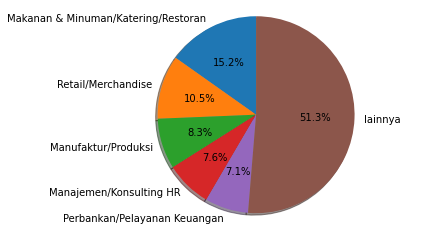

In [ ]:
labels1=['Makanan & Minuman/Katering/Restoran','Retail/Merchandise','Manufaktur/Produksi','Manajemen/Konsulting HR','Perbankan/Pelayanan Keuangan','lainnya']
sizes1=[15.202,10.451,8.314,7.601,7.126,51.306]
fig1, ax1 = plt.subplots()
ax1.pie(sizes1, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [ ]:
train2[train2['highest_edu2']=='Sarjana']['company_industry'].value_counts(normalize=True).head(5)

Manufaktur/Produksi                              0.083014
Komputer/Teknik Informatika (Perangkat Lunak)    0.071781
Makanan & Minuman/Katering/Restoran              0.069863
Umum & Grosir                                    0.066027
Perbankan/Pelayanan Keuangan                     0.064932
Name: company_industry, dtype: float64

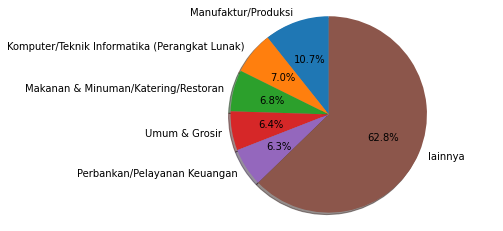

In [ ]:
labels2=['Manufaktur/Produksi','Komputer/Teknik Informatika (Perangkat Lunak)','Makanan & Minuman/Katering/Restoran','Umum & Grosir','Perbankan/Pelayanan Keuangan','lainnya']
sizes2=[10.699,6.99,6.804,6.43,6.323,62.754]
fig1, ax1 = plt.subplots()
ax1.pie(sizes2, labels=labels2, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [ ]:
train2[train2['highest_edu2']=='D4']['company_industry'].value_counts(normalize=True).head(5)

Manufaktur/Produksi                             0.114679
Umum & Grosir                                   0.091743
Makanan & Minuman/Katering/Restoran             0.087156
Retail/Merchandise                              0.082569
Automobil/Mesin Tambahan Automotif/Kendaraan    0.073394
Name: company_industry, dtype: float64

In [ ]:
train2[train2['highest_edu2']=='Magister']['company_industry'].value_counts(normalize=True).head(5)

Manajemen/Konsulting HR                                 0.226481
Komputer/Teknik Informatika (Perangkat Lunak)           0.090592
Retail/Merchandise                                      0.054007
Konsultasi (IT, Ilmu Pengetahuan, Teknis & Teknikal)    0.050523
Umum & Grosir                                           0.047038
Name: company_industry, dtype: float64

In [ ]:
train2[train2['highest_edu2']=='Doktor']['company_industry'].value_counts(normalize=True).head(5)

Manajemen/Konsulting HR    0.200000
Pertambangan               0.171429
Pendidikan                 0.142857
Hukum/Legal                0.142857
Kesehatan/Medis            0.057143
Name: company_industry, dtype: float64

In [ ]:
df_eduind=train2.groupby(['highest_edu2','company_industry']).agg(Mean_salary=('salary','mean'))
df_eduind=df_eduind.reset_index()
df_eduind.sort_values(['Mean_salary'],ascending=False).head(10)

,highest_edu2,company_industry,Mean_salary
49,Doktor,Komputer/Teknik Informatika (Perangkat Lunak),2.400000e+07
237,lainnya,Pertambangan,2.246500e+07
59,Magister,Agrikultural/Perkebunan/Peternakan Unggas/Peri...,1.825000e+07
73,Magister,Kelautan/Aquakultur,1.800000e+07
51,Doktor,Manajemen/Konsulting HR,1.796429e+07
58,Doktor,Umum & Grosir,1.750000e+07
83,Magister,Manajemen/Konsulting HR,1.729577e+07
35,D4,Pertambangan,1.500000e+07
54,Doktor,Polymer/Plastik/Karet/Ban,1.500000e+07
61,Magister,Asuransi,1.378611e+07


In [ ]:
df_sma2=df_eduind[df_eduind['highest_edu2']=='SMA/SMU/SMK/STM'].sort_values(['Mean_salary'],ascending=False).head(5)
df_sarjana2=df_eduind[df_eduind['highest_edu2']=='Sarjana'].sort_values(['Mean_salary'],ascending=False).head(5)

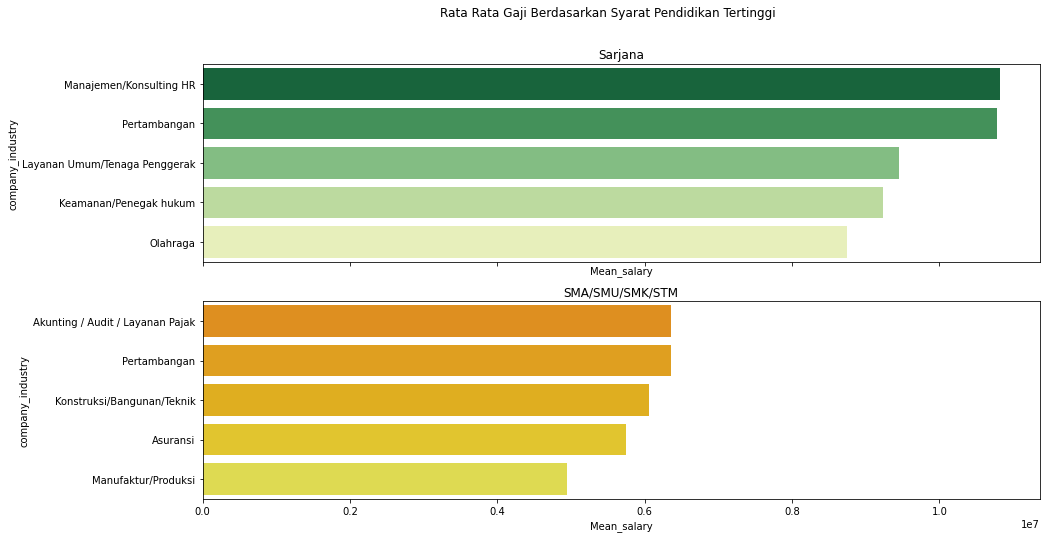

In [ ]:
fig, axes = plt.subplots(2,1 , figsize=(15, 8), sharex=True)
fig.suptitle('Rata Rata Gaji Berdasarkan Syarat Pendidikan Tertinggi')
sns.barplot(y='company_industry',x='Mean_salary',data=df_sarjana2,palette='YlGn_r',ax=axes[0])
axes[0].set_title('Sarjana')
sns.barplot(y='company_industry',x='Mean_salary',data=df_sma2,palette='Wistia_r',ax=axes[1])
axes[1].set_title('SMA/SMU/SMK/STM')
fig.savefig('ind1.png')

In [ ]:
df_edufun=train2.groupby(['highest_edu2','function1','function2']).agg(Mean_salary=('salary','mean'))
df_edufun=df_edufun.reset_index()
df_edufun.sort_values(['Mean_salary'],ascending=False).head(10)

,highest_edu2,function1,function2,Mean_salary
69,Magister,Akuntansi / Keuangan,Keuangan / Investasi Perusahaan,2.724000e+07
221,Sarjana,Sumber Daya Manusia/Personalia,Top Management / Manajemen Tingkat Atas,2.616667e+07
72,Magister,Bangunan/Konstruksi,Properti/Real Estate,2.587500e+07
117,Magister,Sumber Daya Manusia/Personalia,Top Management / Manajemen Tingkat Atas,2.283360e+07
70,Magister,Akuntansi / Keuangan,Perbankan / Jasa Finansial,1.953753e+07
53,Doktor,Akuntansi / Keuangan,Audit & Pajak,1.912500e+07
122,Magister,Teknik,Teknik Industri,1.750000e+07
66,Doktor,Sumber Daya Manusia/Personalia,Top Management / Manajemen Tingkat Atas,1.750000e+07
59,Doktor,Pelayanan,Logistik/Rantai Pasokan,1.683333e+07
246,lainnya,Layanan Kesehatan,Diagnosa/Lainnya,1.619438e+07


In [ ]:
df_sma3=df_edufun[df_edufun['highest_edu2']=='SMA/SMU/SMK/STM'].sort_values(['Mean_salary'],ascending=False).head(5)
df_sarjana3=df_edufun[df_edufun['highest_edu2']=='Sarjana'].sort_values(['Mean_salary'],ascending=False).head(5)

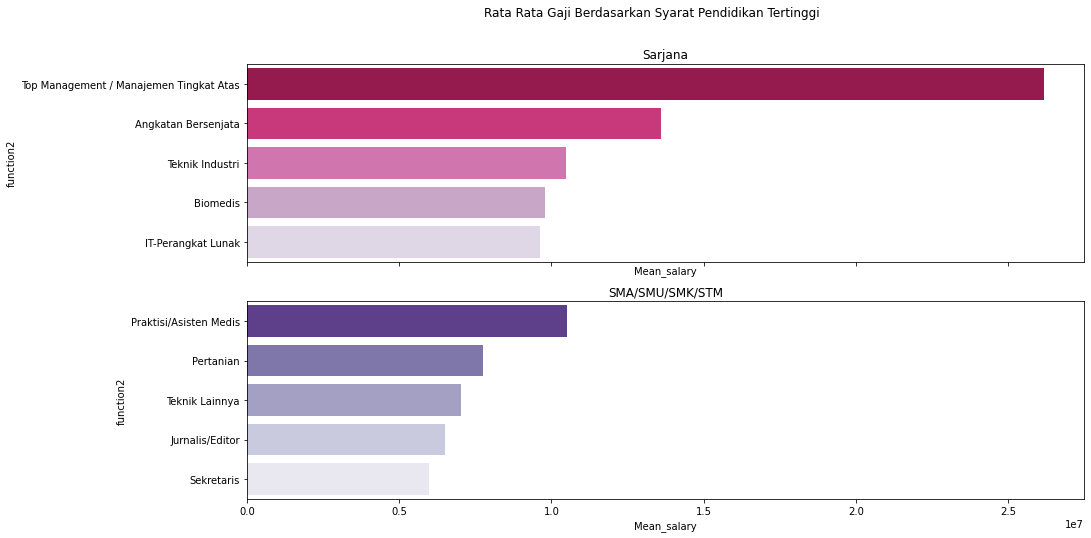

In [ ]:
fig1, axes = plt.subplots(2,1 , figsize=(15, 8), sharex=True)
fig1.suptitle('Rata Rata Gaji Berdasarkan Syarat Pendidikan Tertinggi')
sns.barplot(y='function2',x='Mean_salary',data=df_sarjana3,palette='PuRd_r',ax=axes[0])
axes[0].set_title('Sarjana')
sns.barplot(y='function2',x='Mean_salary',data=df_sma3,palette='Purples_r',ax=axes[1])
axes[1].set_title('SMA/SMU/SMK/STM')
fig1.savefig('fun1.png')

In [ ]:
df_edufun2=train2.groupby(['highest_edu2','function1']).agg(Mean_salary=('salary','mean'))
df_edufun2=df_edufun2.reset_index()
df_edufun2.sort_values(['Mean_salary'],ascending=False).head(10)

,highest_edu2,function1,Mean_salary
19,Doktor,Pelayanan,1.683333e+07
14,Doktor,Akuntansi / Keuangan,1.531250e+07
23,Magister,Akuntansi / Keuangan,1.377800e+07
26,Magister,Komputer/Teknologi Informasi,1.370566e+07
22,Doktor,Sumber Daya Manusia/Personalia,1.317000e+07
30,Magister,Pelayanan,1.309577e+07
18,Doktor,Manufaktur,1.275000e+07
15,Doktor,Komputer/Teknologi Informasi,1.266562e+07
16,Doktor,Lainnya,1.250000e+07
35,Magister,Sumber Daya Manusia/Personalia,1.172176e+07


In [ ]:
df_edufun2[df_edufun2['highest_edu2']=='SMA/SMU/SMK/STM'].sort_values(['Mean_salary'],ascending=False).head()

,highest_edu2,function1,Mean_salary
46,SMA/SMU/SMK/STM,Sains,7750000.00
42,SMA/SMU/SMK/STM,Layanan Kesehatan,6330000.00
43,SMA/SMU/SMK/STM,Manufaktur,4734757.60
49,SMA/SMU/SMK/STM,Teknik,4666500.00
44,SMA/SMU/SMK/STM,Pelayanan,4059413.75


In [ ]:
df_edufun2[df_edufun2['highest_edu2']=='Sarjana'].sort_values(['Mean_salary'],ascending=False).head()

,highest_edu2,function1,Mean_salary
53,Sarjana,Komputer/Teknologi Informasi,9.051980e+06
63,Sarjana,Teknik,7.917808e+06
54,Sarjana,Lainnya,7.378156e+06
57,Sarjana,Pelayanan,7.334013e+06
56,Sarjana,Manufaktur,7.164689e+06


In [ ]:
train2[train2['highest_edu2']=='Sarjana']['function1'].value_counts(normalize=True).head(5)

Penjualan / Pemasaran             0.343650
Komputer/Teknologi Informasi      0.132337
Akuntansi / Keuangan              0.125934
Sumber Daya Manusia/Personalia    0.085646
Manufaktur                        0.057097
Name: function1, dtype: float64

In [ ]:
train2[train2['highest_edu2']=='SMA/SMU/SMK/STM']['function1'].value_counts(normalize=True).head(5)

Penjualan / Pemasaran    0.387173
Hotel/Restoran           0.149644
Akuntansi / Keuangan     0.085511
Lainnya                  0.073634
Manufaktur               0.059382
Name: function1, dtype: float64

### Job_desc Language

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/fit2022/train.csv', delimiter='|')
df = df[df['salary_currency']!='USD']
df = df.drop(columns=['id'])
df_6k = df.dropna(subset=['salary']).reset_index(drop=True)

df_6k['job_description_rev'] = df_6k['job_description'].str.replace('\xa0','')
df_6k['job_desc_lang'] = df_6k['job_description_rev'].str.lower().apply(detect_bhs)

df_6k['job_desc_lang'] = df_6k['job_desc_lang'].str.replace('no','zh-cn').str.replace('ko','zh-cn')
df_6k['job_desc_lang'] = df_6k['job_desc_lang'].str.replace('af','id').str.replace('da','id')

In [ ]:
dumy1 = df_6k.groupby('job_desc_lang').mean().sort_values(by='salary').reset_index()
dumy1

,job_desc_lang,salary
0,id,5.622687e+06
1,en,9.594046e+06
2,zh-cn,1.268571e+07


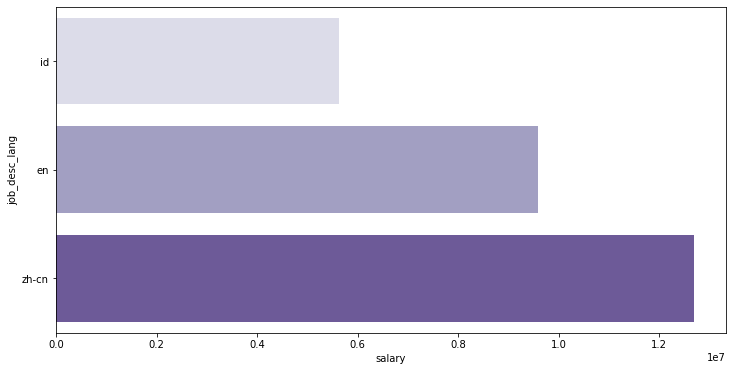

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(y='job_desc_lang',x='salary',palette='Purples',data=dumy1,ax=ax1)
plt.savefig('fopu23.png', bbox_inches='tight')
plt.show()

## Modelling

### Preprocessing

In [ ]:
geolocator = Nominatim()

df = pd.read_csv('/content/drive/MyDrive/fit2022/train.csv', delimiter='|')
df = df[df['salary_currency']!='USD']
df = df.drop(columns=['id'])
df_6k = df.dropna(subset=['salary']).reset_index(drop=True)
df_6k['provinsi'] = df_6k['location'].apply(ext_state)
df_6k['provinsi'] = df_6k['provinsi'].apply(to_jkt)
df_prov = df_6k.copy()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/fit2022/train.csv', delimiter='|')
df = df[df['salary_currency']!='USD']
df = df.drop(columns=['id'])
df_6k = df.dropna(subset=['salary']).reset_index(drop=True)

df_6k['job_title_lower'] = df_6k['job_title'].str.lower()

train_text = df_6k[['job_title_lower']]
train_text = train_text.fillna("")

train_text['job_trans'] = train_text['job_title_lower'].apply(to_en)

lema_kal_txt1 = clean_text(train_text['job_trans'])

dictionary=gensim.corpora.Dictionary(lema_kal_txt1)
dictionary.filter_extremes(no_below=90,no_above=0.7,keep_n=None)

bow_corpus=[dictionary.doc2bow(doc) for doc in lema_kal_txt1] 
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    lda_train = gensim.models.LdaMulticore(corpus_tfidf,num_topics=7,id2word=dictionary,alpha='symmetric',eta=0.01,passes=2,workers=4,random_state=7)
    lda_train.save('lda_train.model')

train_vecs = []
for i in range(len(train_text['job_trans'])):
    top_topics = (lda_train.get_document_topics(corpus_tfidf[i], minimum_probability=0.0))   
    topic_vec = [top_topics[i][1] for i in range(7)]
    train_vecs.append(topic_vec)

teks_train = pd.DataFrame(train_vecs, columns = ['topic_'+ str(i) for i in range(len(train_vecs[0]))])
df_job_vec = teks_train.copy()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/fit2022/train.csv', delimiter='|')
df = df[df['salary_currency']!='USD']
df = df.drop(columns=['id'])
df_6k = df.dropna(subset=['salary']).reset_index(drop=True)

df_6k['job_description_rev'] = df_6k['job_description'].str.replace('\xa0','') 
df_6k['job_desc_lang'] = df_6k['job_description_rev'].str.lower().apply(detect_bhs) 

df_6k['job_desc_lang'] = df_6k['job_desc_lang'].str.replace('no','zh-cn').str.replace('ko','zh-cn') 
df_6k['job_desc_lang'] = df_6k['job_desc_lang'].str.replace('af','id').str.replace('da','id') 

df_6k[['function1','function2']]=(df_6k['job_function'].str.split(',',expand=True)) 
df_6k['bin_comp_ind'] = df_6k['company_industry'].apply(bin_comp_ind) 
df_6k['bin_employ_type'] = df_6k['employment_type'].str.split(' ').str[0] 
df_6k['highest_edu'] = df_6k['education_level'].apply(lambda x: highest_edu(x)) 

df_prov['provinsi_r'] = df_prov['provinsi'].replace('DKI Jakarta','Jakarta Raya').replace('Daerah Istimewa Yogyakarta','Yogyakarta').replace('Kepulauan Bangka Belitung','Bangka Belitung')
df_6k['provinsi'] = df_prov['provinsi_r'] 

df_6k['bin_wil'] = df_6k['provinsi'].apply(bin_wil) 
df_6k['experience_level'] = df_6k['experience_level'].fillna(df_6k['experience_level'].value_counts().index[0])
df_6k['experience_level']= df_6k['experience_level'].str.split(' ').str[0]
df_6k['bin_exp_level'] = df_6k['experience_level'].apply(exp)

df_6k = pd.concat([df_6k,df_job_vec], axis=1)
df_6k = df_6k[df_6k['salary']>6000]


### Evaluation

#### Baseline

In [ ]:
def masuk_pak_eko(df):
  df['bin_comp_ind'] = df['bin_comp_ind'].fillna(df_6k['bin_comp_ind'].value_counts().index[0])
  return df

estimator1 = [
    ('xgb', XGBRegressor(objective='reg:squarederror', random_state=69)),
    ('rf', RandomForestRegressor(random_state=69)),
    ('lgbm', LGBMRegressor(objective='root_mean_squared_error', random_state=69)),
    ('cb', cb.CatBoostRegressor(metric_period=1000, loss_function='RMSE',random_state=69, verbose=0))
    
]
newvote = VotingRegressor(estimators=estimator1)


rf = RandomForestRegressor(random_state=69)
xgb = XGBRegressor(objective='reg:squarederror',verbosity = 0, random_state=69)
lgbm = LGBMRegressor(objective='root_mean_squared_error',random_state=69)
catbus = cb.CatBoostRegressor(metric_period=1000, loss_function='RMSE',random_state=69, verbose=0)

regressor = [rf,xgb,lgbm,catbus,newvote]
regressornama = ['RF','XGB','LGBM','CB','Vote-4M']

def rmse_kfold(X_1, y_1,cv=5,status=False):

  skf = StratifiedKFold(n_splits=5, random_state=69, shuffle=True)
  
  for i,j in enumerate(regressor):
    rmse_list = []
    for train_index, test_index in skf.split(X_1, y_1):
      X_train, X_test = X_1.iloc[train_index], X_1.iloc[test_index]
      y_train, y_test = y_1.iloc[train_index], y_1.iloc[test_index]

      X_train = masuk_pak_eko(X_train)
      X_test = masuk_pak_eko(X_test)

      X_train = pd.get_dummies(X_train,drop_first=status)
      X_test = pd.get_dummies(X_test,drop_first=status)

      X_train_int = X_train[X_train.columns.intersection(X_test.columns)] #menyamakan kolom yg ada
      X_test_int = X_test[X_test.columns.intersection(X_train_int.columns)]

      j.fit(X_train_int, y_train)
      y_pred = j.predict(X_test_int)
      rmse = mean_squared_error(y_test, y_pred)**(1/2)
      rmse_list.append(rmse)

    print(f"[{regressornama[i]}] RMSE : {sum(rmse_list)/cv}")
  print(X_train_int.shape)


In [ ]:
X = df_6k[['career_level','bin_exp_level','highest_edu','job_desc_lang', 
           'function1','function2', 'bin_comp_ind', 'bin_employ_type', 'bin_wil',
           'topic_0', 'topic_1', 'topic_2','topic_3', 'topic_4', 'topic_5', 'topic_6'
    ]]
y = df_6k['salary']

rmse_kfold(X,y,status=False)

#### Tuned Model

In [ ]:
X = df_6k[['career_level','bin_exp_level','highest_edu','job_desc_lang', 
           'function1','function2', 'bin_comp_ind', 'bin_employ_type', 'bin_wil',
           'topic_0', 'topic_1', 'topic_2','topic_3', 'topic_4', 'topic_5', 'topic_6'
    ]]
y = df_6k['salary']

X= masuk_pak_eko(X)
X = pd.get_dummies(X)

In [ ]:
lgbm = LGBMRegressor(objective='root_mean_squared_error',random_state=69)

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

cv=StratifiedKFold(n_splits=5, random_state=69,shuffle=True)

random_grid = {'learning_rate':[0.1,0.05],
  'n_estimators':[100,250,500,1000], 'max_depth':[2,3,4,5,10,20]}

lgbm_random = RandomizedSearchCV(estimator = lgbm,param_distributions = random_grid,
               n_iter = 500, cv = cv, random_state=69, n_jobs = -1,scoring='neg_root_mean_squared_error', verbose=10)

lgbm_random.fit(X,y)

In [ ]:
print ('Best Parameters: ', lgbm_random.best_params_, ' \n')

In [ ]:
catbus = cb.CatBoostRegressor(metric_period=1000, loss_function='RMSE',random_state=69, verbose=0)

cv=StratifiedKFold(n_splits=5, random_state=69,shuffle=True)

random_grid = {'learning_rate':[0.1,0.05],
  'n_estimators':[100,250,500,750,1000], 'max_depth':[3,4,5,7,8,10]}

cat_random = RandomizedSearchCV(estimator = catbus,param_distributions = random_grid,
               n_iter = 500, cv = cv, random_state=69, n_jobs = -1,scoring='neg_root_mean_squared_error', verbose=10)

cat_random.fit(X,y)

In [ ]:
print ('Best Parameters: ', cat_random.best_params_, ' \n')

In [ ]:
rf = RandomForestRegressor(random_state=69)
xgb = XGBRegressor(n_estimators=750,learning_rate=0.05,max_depth=3,objective='reg:squarederror',verbosity = 0, random_state=69)
lgbm = LGBMRegressor(n_estimators=500,max_depth=5, learning_rate=0.1,objective='root_mean_squared_error',random_state=69)
catbus = cb.CatBoostRegressor(metric_period=1000, loss_function='RMSE',random_state=69, verbose=0)

estimator1 = [
    ('xgb', xgb),
    ('rf', rf),
    ('lgbm',lgbm),
    ('cb', catbus)
    
]
newvote = VotingRegressor(estimators=estimator1)

regressor = [rf,xgb,lgbm,catbus,newvote]
regressornama = ['RF','XGB','LGBM','CB','Vote-4M']

def rmse_kfold(X_1, y_1,cv=5,status=False):

  skf = StratifiedKFold(n_splits=5, random_state=69, shuffle=True)
  
  for i,j in enumerate(regressor):
    rmse_list = []
    for train_index, test_index in skf.split(X_1, y_1):
      X_train, X_test = X_1.iloc[train_index], X_1.iloc[test_index]
      y_train, y_test = y_1.iloc[train_index], y_1.iloc[test_index]

      X_train = masuk_pak_eko(X_train)
      X_test = masuk_pak_eko(X_test)

      X_train = pd.get_dummies(X_train,drop_first=status)
      X_test = pd.get_dummies(X_test,drop_first=status)

      X_train_int = X_train[X_train.columns.intersection(X_test.columns)] #menyamakan kolom yg ada
      X_test_int = X_test[X_test.columns.intersection(X_train_int.columns)]

      j.fit(X_train_int, y_train)
      y_pred = j.predict(X_test_int)
      rmse = mean_squared_error(y_test, y_pred)**(1/2)
      rmse_list.append(rmse)

    print(f"[{regressornama[i]}] RMSE : {sum(rmse_list)/cv}")
  print(X_train_int.shape)


In [ ]:
X = df_6k[['career_level','bin_exp_level','highest_edu','job_desc_lang', 
           'function1','function2', 'bin_comp_ind', 'bin_employ_type', 'bin_wil',
           'topic_0', 'topic_1', 'topic_2','topic_3', 'topic_4', 'topic_5', 'topic_6'
    ]]
y = df_6k['salary']

rmse_kfold(X,y,status=False)